In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials 

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '1Nl6SYOBwJT9F1GmtI5U9BSacr6EdsrVc'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('ThoraricSurgery.csv')

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np
import tensorflow as tf

np.random.seed(3)
tf.random.set_seed(3)

Data_set = np.loadtxt('ThoraricSurgery.csv', delimiter=",")

X = Data_set[:, 0:17]
Y = Data_set[:, 17]

model = Sequential()
model.add(Dense(30, input_dim=17, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, epochs=100, batch_size=10)

Epoch 1/100
47/47 [==============================] - 0s 1ms/step - loss: 0.1534 - accuracy: 0.8447
Epoch 2/100
47/47 [==============================] - 0s 1ms/step - loss: 0.1489 - accuracy: 0.8511
Epoch 3/100
47/47 [==============================] - 0s 1ms/step - loss: 0.1489 - accuracy: 0.8511
Epoch 4/100
47/47 [==============================] - 0s 1ms/step - loss: 0.1489 - accuracy: 0.8511
Epoch 5/100
47/47 [==============================] - 0s 1ms/step - loss: 0.1489 - accuracy: 0.8511
Epoch 6/100
47/47 [==============================] - 0s 1ms/step - loss: 0.1489 - accuracy: 0.8511
Epoch 7/100
47/47 [==============================] - 0s 1ms/step - loss: 0.1489 - accuracy: 0.8511
Epoch 8/100
47/47 [==============================] - 0s 1ms/step - loss: 0.1489 - accuracy: 0.8511
Epoch 9/100
47/47 [==============================] - 0s 1ms/step - loss: 0.1489 - accuracy: 0.8511
Epoch 10/100
47/47 [==============================] - 0s 1ms/step - loss: 0.1489 - accuracy: 0.8511
Epoch 11/

In [0]:
file_id = '1Oq9LWJuz0ZdL9yiUVDamNC6XWDS_6-6_'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('pima-indians-diabetes.csv')

In [0]:
import pandas as pd
df = pd.read_csv('pima-indians-diabetes.csv', names=['pregnant', 'plasma', 'pressure', 'thickness', 'insulin', 'BMI', 'pedigree', 'age', 'class'])

In [5]:
print(df.head())

   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df[['pregnant', 'class']]

,pregnant,class
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


In [9]:
print(df[['pregnant', 'class']].groupby(['pregnant'], as_index=False).mean().sort_values(by='pregnant', ascending=True))

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


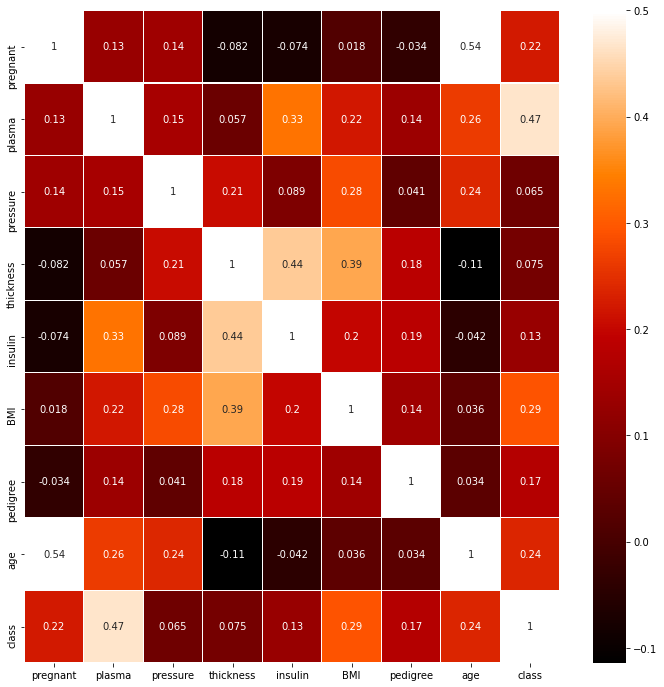

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), linewidth=0.1, vmax=0.5, cmap=plt.cm.gist_heat, linecolor='white', annot=True)
plt.show()

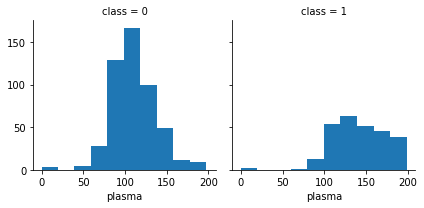

In [11]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

In [12]:
np.random.seed(3)
tf.random.set_seed(3)

dataset = np.loadtxt('pima-indians-diabetes.csv', delimiter=',')
X = dataset[:, 0:8]
Y = dataset[:,8]

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, Y, epochs=200, batch_size=10)

print('\n Accuracy:%.4f' % (model.evaluate(X, Y)[1]))

Epoch 1/200
77/77 [==============================] - 0s 1ms/step - loss: 10.5658 - accuracy: 0.6159
Epoch 2/200
77/77 [==============================] - 0s 1ms/step - loss: 5.4303 - accuracy: 0.6029
Epoch 3/200
77/77 [==============================] - 0s 1ms/step - loss: 2.9250 - accuracy: 0.5208
Epoch 4/200
77/77 [==============================] - 0s 1ms/step - loss: 1.5330 - accuracy: 0.5208
Epoch 5/200
77/77 [==============================] - 0s 1ms/step - loss: 0.8908 - accuracy: 0.5000
Epoch 6/200
77/77 [==============================] - 0s 1ms/step - loss: 0.8068 - accuracy: 0.5234
Epoch 7/200
77/77 [==============================] - 0s 1ms/step - loss: 0.7648 - accuracy: 0.6549
Epoch 8/200
77/77 [==============================] - 0s 1ms/step - loss: 0.7319 - accuracy: 0.6628
Epoch 9/200
77/77 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.6706
Epoch 10/200
77/77 [==============================] - 0s 1ms/step - loss: 0.6657 - accuracy: 0.6758
Epoch 11

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials 

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1sxjj3p8_9g41_uxd1O9KHYv191_E8h7e'
downloaded1 = drive.CreateFile({'id': file_id})
downloaded1.GetContentFile('iris.csv')

In [14]:
import pandas as pd
df = pd.read_csv('iris.csv', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


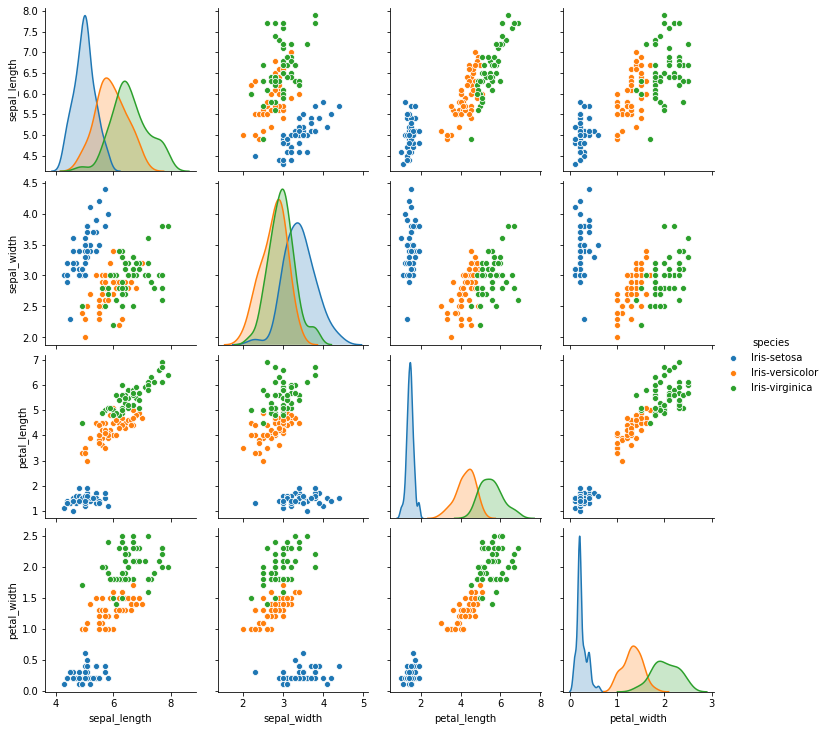

In [15]:
import seaborn
import matplotlib.pyplot as plt

sns.pairplot(df, hue='species')
plt.show()

In [0]:
dataset = df.values
X = dataset[:, 0:4].astype(float)
Y_obj = dataset[:, 4]

In [0]:
from sklearn.preprocessing import LabelEncoder

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

In [18]:
from keras.utils import np_utils

Y_encoded = tf.keras.utils.to_categorical(Y)

Using TensorFlow backend.


In [19]:
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, Y_encoded, epochs=50, batch_size=1)
print('\n Accuracy:%.4f' % (model.evaluate(X, Y_encoded)[1]))

Epoch 1/50
150/150 [==============================] - 0s 1ms/step - loss: 1.1056 - accuracy: 0.3867
Epoch 2/50
150/150 [==============================] - 0s 891us/step - loss: 0.7203 - accuracy: 0.7333
Epoch 3/50
150/150 [==============================] - 0s 887us/step - loss: 0.5782 - accuracy: 0.8467
Epoch 4/50
150/150 [==============================] - 0s 903us/step - loss: 0.5086 - accuracy: 0.8533
Epoch 5/50
150/150 [==============================] - 0s 941us/step - loss: 0.4637 - accuracy: 0.8933
Epoch 6/50
150/150 [==============================] - 0s 932us/step - loss: 0.4287 - accuracy: 0.9333
Epoch 7/50
150/150 [==============================] - 0s 894us/step - loss: 0.4032 - accuracy: 0.9400
Epoch 8/50
150/150 [==============================] - 0s 937us/step - loss: 0.3873 - accuracy: 0.9267
Epoch 9/50
150/150 [==============================] - 0s 913us/step - loss: 0.3702 - accuracy: 0.9267
Epoch 10/50
150/150 [==============================] - 0s 914us/step - loss: 0.3560 

In [0]:
file_id = '1fB7IcP3uIG0L-hLzm65UyrPnvx4MnifP'
downloaded2 = drive.CreateFile({'id': file_id})
downloaded2.GetContentFile('sonar.csv')

In [21]:
import pandas as pd

df = pd.read_csv('sonar.csv', header=None)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [22]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [23]:
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import tensorflow as tf

np.random.seed(3)
tf.random.set_seed(3)

df = pd.read_csv('sonar.csv', header=None)

dataset = df.values
X = dataset[:, 0:60]
Y_obj = dataset[:, 60]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

model.fit(X, Y, epochs=200, batch_size=5)

print('\n Accuracy:%.4f'%(model.evaluate(X, Y)[1]))

Epoch 1/200
208/208 [==============================] - 0s 592us/step - loss: 0.2469 - accuracy: 0.5625
Epoch 2/200
208/208 [==============================] - 0s 213us/step - loss: 0.2408 - accuracy: 0.5433
Epoch 3/200
208/208 [==============================] - 0s 235us/step - loss: 0.2272 - accuracy: 0.6106
Epoch 4/200
208/208 [==============================] - 0s 224us/step - loss: 0.2185 - accuracy: 0.6346
Epoch 5/200
208/208 [==============================] - 0s 218us/step - loss: 0.2099 - accuracy: 0.6971
Epoch 6/200
208/208 [==============================] - 0s 224us/step - loss: 0.2024 - accuracy: 0.7212
Epoch 7/200
208/208 [==============================] - 0s 228us/step - loss: 0.1938 - accuracy: 0.7404
Epoch 8/200
208/208 [==============================] - 0s 220us/step - loss: 0.1852 - accuracy: 0.7740
Epoch 9/200
208/208 [==============================] - 0s 215us/step - loss: 0.1753 - accuracy: 0.7981
Epoch 10/200
208/208 [==============================] - 0s 241us/step - l

In [24]:
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold

import pandas as pd
import numpy as np
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
df = pd.read_csv('sonar.csv', header=None)
dataset = df.values
X = dataset[:, 0:60]
Y_obj = dataset[:, 60]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=130, batch_size=5)

print('\n Test Accuracy:%.4f'%(model.evaluate(X_test, Y_test)[1]))

Epoch 1/130
145/145 [==============================] - 0s 832us/step - loss: 0.2522 - accuracy: 0.5310
Epoch 2/130
145/145 [==============================] - 0s 259us/step - loss: 0.2463 - accuracy: 0.5172
Epoch 3/130
145/145 [==============================] - 0s 251us/step - loss: 0.2440 - accuracy: 0.5379
Epoch 4/130
145/145 [==============================] - 0s 255us/step - loss: 0.2420 - accuracy: 0.5310
Epoch 5/130
145/145 [==============================] - 0s 264us/step - loss: 0.2398 - accuracy: 0.5448
Epoch 6/130
145/145 [==============================] - 0s 264us/step - loss: 0.2382 - accuracy: 0.5517
Epoch 7/130
145/145 [==============================] - 0s 265us/step - loss: 0.2340 - accuracy: 0.5448
Epoch 8/130
145/145 [==============================] - 0s 230us/step - loss: 0.2300 - accuracy: 0.5586
Epoch 9/130
145/145 [==============================] - 0s 235us/step - loss: 0.2211 - accuracy: 0.6552
Epoch 10/130
145/145 [==============================] - 0s 251us/step - l

In [25]:
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

import pandas as pd
import numpy as np
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
df = pd.read_csv('sonar.csv', header=None)
dataset = df.values
X = dataset[:, 0:60]
Y_obj = dataset[:, 60]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

n_fold = 10
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

accuracy = []

for train, test in skf.split(X, Y):
  model = Sequential()
  model.add(Dense(24, input_dim=60, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
  model.fit(X[train], Y[train], epochs=100, batch_size=5)
  k_accuracy = '%.4f'%(model.evaluate(X[test], Y[test])[1])
  accuracy.append(k_accuracy)

print('\n %.f fold Accuracy:'%n_fold, accuracy)

Epoch 1/100
187/187 [==============================] - 0s 613us/step - loss: 0.2530 - accuracy: 0.4866
Epoch 2/100
187/187 [==============================] - 0s 226us/step - loss: 0.2441 - accuracy: 0.5401
Epoch 3/100
187/187 [==============================] - 0s 217us/step - loss: 0.2404 - accuracy: 0.5348
Epoch 4/100
187/187 [==============================] - 0s 231us/step - loss: 0.2342 - accuracy: 0.5348
Epoch 5/100
187/187 [==============================] - 0s 224us/step - loss: 0.2289 - accuracy: 0.5455
Epoch 6/100
187/187 [==============================] - 0s 222us/step - loss: 0.2179 - accuracy: 0.6043
Epoch 7/100
187/187 [==============================] - 0s 235us/step - loss: 0.2068 - accuracy: 0.6791
Epoch 8/100
187/187 [==============================] - 0s 223us/step - loss: 0.1948 - accuracy: 0.6845
Epoch 9/100
187/187 [==============================] - 0s 221us/step - loss: 0.1834 - accuracy: 0.7487
Epoch 10/100
187/187 [==============================] - 0s 220us/step - l

In [0]:
file_id = '1lzDJerOjrYCntwKNTh4_7mCp5c5T0Y4D'
downloaded3 = drive.CreateFile({'id': file_id})
downloaded3.GetContentFile('wine.csv')

In [27]:
df_pre = pd.read_csv('wine.csv', header=None)
df = df_pre.sample(frac=1)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
751,8.3,0.65,0.10,2.9,0.089,17.0,40.0,0.99803,3.29,0.55,9.5,5,1
1941,6.4,0.26,0.42,9.7,0.044,30.0,140.0,0.99620,3.18,0.47,9.1,6,0
1184,6.7,0.64,0.23,2.1,0.080,11.0,119.0,0.99538,3.36,0.70,10.9,5,1
3048,6.9,0.19,0.49,6.6,0.036,49.0,172.0,0.99320,3.20,0.27,11.5,6,0
2749,6.9,0.32,0.17,7.6,0.042,69.0,219.0,0.99590,3.13,0.40,8.9,5,0


In [28]:
df.info

<bound method DataFrame.info of        0     1     2     3      4     5   ...       7     8     9     10  11  12
751   8.3  0.65  0.10   2.9  0.089  17.0  ...  0.99803  3.29  0.55   9.5   5   1
1941  6.4  0.26  0.42   9.7  0.044  30.0  ...  0.99620  3.18  0.47   9.1   6   0
1184  6.7  0.64  0.23   2.1  0.080  11.0  ...  0.99538  3.36  0.70  10.9   5   1
3048  6.9  0.19  0.49   6.6  0.036  49.0  ...  0.99320  3.20  0.27  11.5   6   0
2749  6.9  0.32  0.17   7.6  0.042  69.0  ...  0.99590  3.13  0.40   8.9   5   0
...   ...   ...   ...   ...    ...   ...  ...      ...   ...   ...   ...  ..  ..
4106  7.1  0.34  0.31   5.2  0.032  36.0  ...  0.99166  3.35  0.47  12.3   7   0
1126  5.8  0.29  0.26   1.7  0.063   3.0  ...  0.99150  3.39  0.54  13.5   6   1
2303  5.6  0.25  0.26   3.6  0.037  18.0  ...  0.99040  3.42  0.50  12.6   6   0
5799  8.0  0.24  0.33   1.2  0.044  28.0  ...  0.99035  3.03  0.43  12.5   6   0
5613  6.5  0.18  0.48  18.0  0.054  56.0  ...  1.00038  2.98  0.61   8.5   6 

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

df_pre = pd.read_csv('wine.csv', header=None)
df = df_pre.sample(frac=1)
dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, Y, epochs=200, batch_size=200)

print('\n Accuracy:%.4f'%(model.evaluate(X, Y)[1]))

Epoch 1/200
6497/6497 [==============================] - 0s 24us/step - loss: 3.5323 - accuracy: 0.2461
Epoch 2/200
6497/6497 [==============================] - 0s 7us/step - loss: 0.4326 - accuracy: 0.8110
Epoch 3/200
6497/6497 [==============================] - 0s 7us/step - loss: 0.2418 - accuracy: 0.9257
Epoch 4/200
6497/6497 [==============================] - 0s 7us/step - loss: 0.2142 - accuracy: 0.9300
Epoch 5/200
6497/6497 [==============================] - 0s 7us/step - loss: 0.2039 - accuracy: 0.9306
Epoch 6/200
6497/6497 [==============================] - 0s 7us/step - loss: 0.1979 - accuracy: 0.9320
Epoch 7/200
6497/6497 [==============================] - 0s 7us/step - loss: 0.1931 - accuracy: 0.9324
Epoch 8/200
6497/6497 [==============================] - 0s 7us/step - loss: 0.1888 - accuracy: 0.9324
Epoch 9/200
6497/6497 [==============================] - 0s 7us/step - loss: 0.1865 - accuracy: 0.9329
Epoch 10/200
6497/6497 [==============================] - 0s 7us/step - 

In [41]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

import pandas as pd
import numpy
import os
import matplotlib.pyplot as plt
import tensorflow as tf

seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

df_pre = pd.read_csv('wine.csv', header=None)
df = df_pre.sample(frac=0.15)

dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
   os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

history = model.fit(X, Y, validation_split=0.33, epochs=1000, batch_size=500)
y_vloss=history.history['val_loss']
y_acc=history.history['acc']

x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()

Train on 653 samples, validate on 322 samples
Epoch 1/1000
653/653 [==============================] - 0s 207us/step - loss: 0.5552 - accuracy: 0.7596 - val_loss: 0.4822 - val_accuracy: 0.7826
Epoch 2/1000
653/653 [==============================] - 0s 12us/step - loss: 0.5047 - accuracy: 0.7596 - val_loss: 0.4472 - val_accuracy: 0.7826
Epoch 3/1000
653/653 [==============================] - 0s 12us/step - loss: 0.4692 - accuracy: 0.7580 - val_loss: 0.4216 - val_accuracy: 0.7826
Epoch 4/1000
653/653 [==============================] - 0s 12us/step - loss: 0.4386 - accuracy: 0.7596 - val_loss: 0.4090 - val_accuracy: 0.7733
Epoch 5/1000
653/653 [==============================] - 0s 11us/step - loss: 0.4211 - accuracy: 0.7565 - val_loss: 0.3965 - val_accuracy: 0.7764
Epoch 6/1000
653/653 [==============================] - 0s 12us/step - loss: 0.4019 - accuracy: 0.7626 - val_loss: 0.3770 - val_accuracy: 0.7888
Epoch 7/1000
653/653 [==============================] - 0s 10us/step - loss: 0.3856

KeyError: ignored

In [36]:
from keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)
model.fit(X, Y, validation_split=0.33, epochs=2000, batch_size=500, callbacks=[early_stopping_callback])

Train on 4352 samples, validate on 2145 samples
Epoch 1/2000
4352/4352 [==============================] - 0s 7us/step - loss: 0.0127 - accuracy: 0.9961 - val_loss: 0.0617 - val_accuracy: 0.9925
Epoch 2/2000
4352/4352 [==============================] - 0s 5us/step - loss: 0.0133 - accuracy: 0.9945 - val_loss: 0.0603 - val_accuracy: 0.9911
Epoch 3/2000
4352/4352 [==============================] - 0s 5us/step - loss: 0.0124 - accuracy: 0.9954 - val_loss: 0.0605 - val_accuracy: 0.9916
Epoch 4/2000
4352/4352 [==============================] - 0s 5us/step - loss: 0.0156 - accuracy: 0.9947 - val_loss: 0.0613 - val_accuracy: 0.9916
Epoch 5/2000
4352/4352 [==============================] - 0s 6us/step - loss: 0.0141 - accuracy: 0.9947 - val_loss: 0.0646 - val_accuracy: 0.9916
Epoch 6/2000
4352/4352 [==============================] - 0s 6us/step - loss: 0.0138 - accuracy: 0.9949 - val_loss: 0.0690 - val_accuracy: 0.9902
Epoch 7/2000
4352/4352 [==============================] - 0s 5us/step - loss

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials 

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1QZecsECqfJO4dXD0rTYAu6GB35aop1fn'
downloaded4 = drive.CreateFile({'id': file_id})
downloaded4.GetContentFile('housing.csv')

In [46]:
import pandas as pd
df = pd.read_csv('housing.csv', delim_whitespace=True, header=None)
df.info

<bound method DataFrame.info of           0     1      2   3      4   ...     9     10      11    12    13
0    0.00632  18.0   2.31   0  0.538  ...  296.0  15.3  396.90  4.98  24.0
1    0.02731   0.0   7.07   0  0.469  ...  242.0  17.8  396.90  9.14  21.6
2    0.02729   0.0   7.07   0  0.469  ...  242.0  17.8  392.83  4.03  34.7
3    0.03237   0.0   2.18   0  0.458  ...  222.0  18.7  394.63  2.94  33.4
4    0.06905   0.0   2.18   0  0.458  ...  222.0  18.7  396.90  5.33  36.2
..       ...   ...    ...  ..    ...  ...    ...   ...     ...   ...   ...
501  0.06263   0.0  11.93   0  0.573  ...  273.0  21.0  391.99  9.67  22.4
502  0.04527   0.0  11.93   0  0.573  ...  273.0  21.0  396.90  9.08  20.6
503  0.06076   0.0  11.93   0  0.573  ...  273.0  21.0  396.90  5.64  23.9
504  0.10959   0.0  11.93   0  0.573  ...  273.0  21.0  393.45  6.48  22.0
505  0.04741   0.0  11.93   0  0.573  ...  273.0  21.0  396.90  7.88  11.9

[506 rows x 14 columns]>

In [47]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [51]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

df = pd.read_csv('housing.csv', delim_whitespace=True, header=None)

dataset = df.values
X = dataset[:, 0:13]
Y = dataset[:, 13]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=200, batch_size=10)

Y_prediction = model.predict(X_test).flatten()
for i in range(10):
  label = Y_test[i]
  prediction = Y_prediction[i]
  print('real:{} predict:{}'.format(label, prediction))

Epoch 1/200
354/354 [==============================] - 0s 319us/step - loss: 1759.5766
Epoch 2/200
354/354 [==============================] - 0s 128us/step - loss: 196.6716
Epoch 3/200
354/354 [==============================] - 0s 111us/step - loss: 112.8408
Epoch 4/200
354/354 [==============================] - 0s 114us/step - loss: 82.3305
Epoch 5/200
354/354 [==============================] - 0s 109us/step - loss: 68.2427
Epoch 6/200
354/354 [==============================] - 0s 110us/step - loss: 63.4756
Epoch 7/200
354/354 [==============================] - 0s 112us/step - loss: 58.5064
Epoch 8/200
354/354 [==============================] - 0s 106us/step - loss: 57.7649
Epoch 9/200
354/354 [==============================] - 0s 115us/step - loss: 55.5968
Epoch 10/200
354/354 [==============================] - 0s 107us/step - loss: 54.5430
Epoch 11/200
354/354 [==============================] - 0s 116us/step - loss: 52.7896
Epoch 12/200
354/354 [==============================] - 0s 